## **Prodigy_DS_04**
# Yashika Tirkey

In [1]:
import nltk
import string
import spacy
nltk.download('all')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('english')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
column_names = ['Id','Company','Sentiment','Text']


In [8]:
train = pd.read_csv('/content/drive/MyDrive/Twitter_data/twitter_training.csv',sep=',',names=column_names)
valid = pd.read_csv('/content/drive/MyDrive/Twitter_data/twitter_validation.csv',sep=',',names=column_names)

In [9]:
train.head()

,Id,Company,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
valid.head()

,Id,Company,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [10]:
print("Duplicates row in Train data : ",train.duplicated().sum())
print("Duplicates row in Valid data : ",valid.duplicated().sum())

Duplicates row in Train data :  2700
Duplicates row in Valid data :  0


In [12]:
train.drop_duplicates(inplace=True)

In [13]:
print("Duplicates row in Train data : ",train.duplicated().sum())
print("Duplicates row in Valid data : ",valid.duplicated().sum())

Duplicates row in Train data :  0
Duplicates row in Valid data :  0


In [14]:
print("Rows and Column in Train data ", train.shape)
print("Rows and Column in valid data ", valid.shape)

Rows and Column in Train data  (71982, 4)
Rows and Column in valid data  (1000, 4)


In [15]:
print(train.isnull().sum())

Id             0
Company        0
Sentiment      0
Text         326
dtype: int64


In [16]:
print(valid.isnull().sum())

Id           0
Company      0
Sentiment    0
Text         0
dtype: int64


In [17]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [18]:
train = train.sort_values('Company')

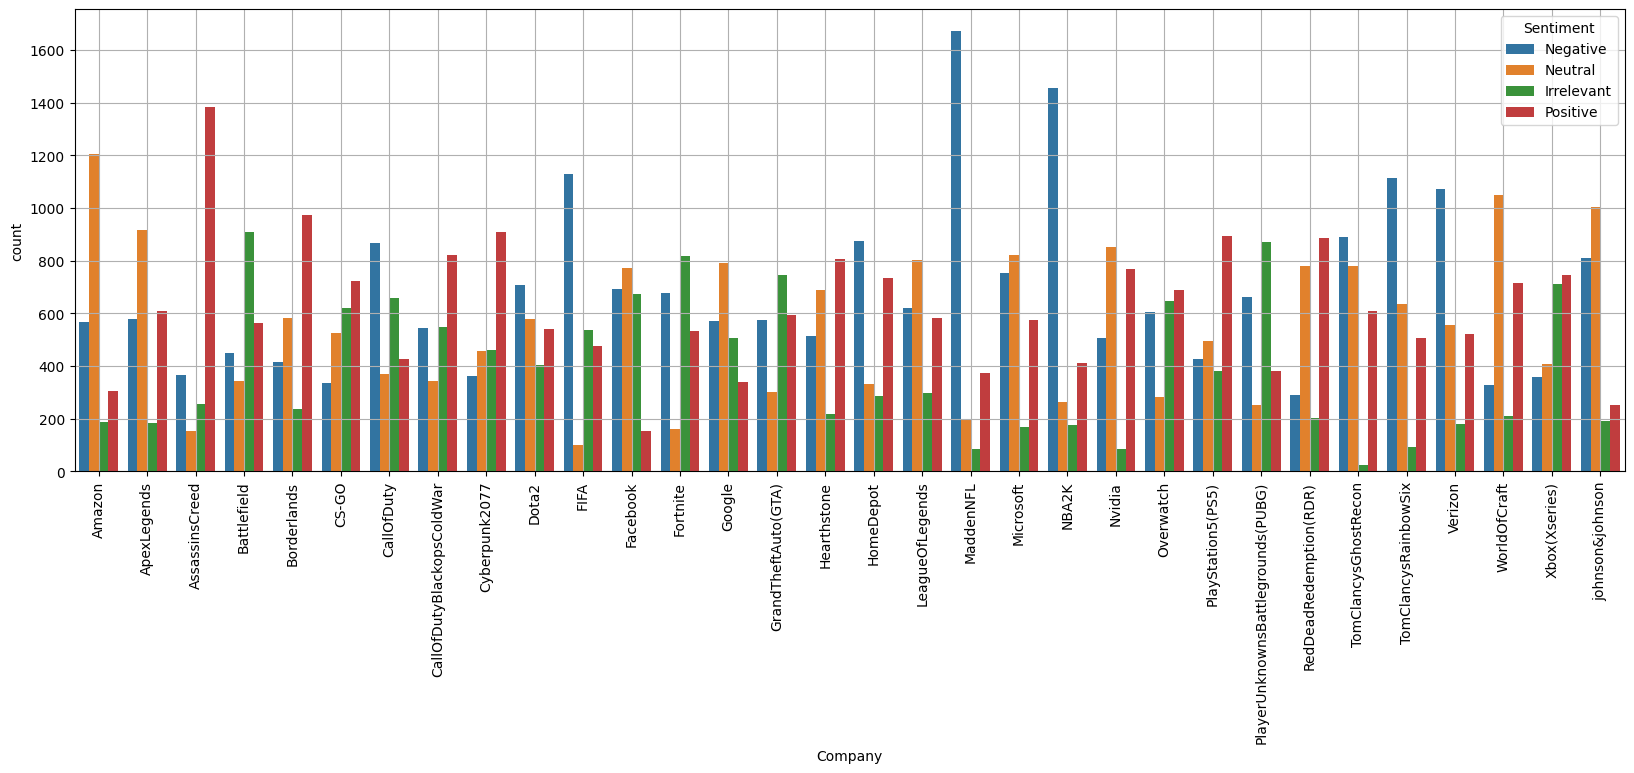

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(x=train['Company'], hue=train['Sentiment'])
plt.xticks(rotation=90)
plt.grid()


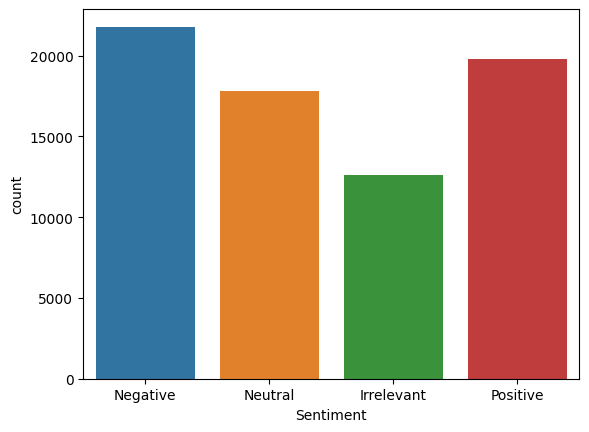

In [20]:
sns.countplot(x=train['Sentiment'])
plt.show()

In [22]:
!pip install cleantext

In [27]:
from cleantext import clean
import re
def text_conversion(obj):
    token_list = []
    string_conv = re.sub(r'[0-9]', '_', str(obj))
    removed_urls = re.sub(r'http\S+', '', str(string_conv))
    for tokens in nltk.word_tokenize(str(removed_urls)):
        if tokens not in string.punctuation and tokens.isalpha():
            token_list.append(tokens)
    return ' '.join(token_list)

In [28]:
valid['Text'] = valid['Text'].apply(lambda x: text_conversion(x))

In [29]:
valid['Length_Text'] = valid['Text'].apply(lambda x: len(x))

In [30]:
train['Text'] = train['Text'].apply(lambda x: text_conversion(x))

In [31]:
train['Length_Text'] = train['Text'].apply(lambda x: len(x))

In [32]:
train['Text'][580]

'Top all favourite adventure games you say are UNK Sea of Thieves Bioshock Battlefield In What happens about when you want ChloeSauras ChrisLawis'

In [33]:
train['Text'][581]

'My favourite episodes who say unk Sea of Thieves Bioshock and What about you ChloeSauras What ChrisLawis I'

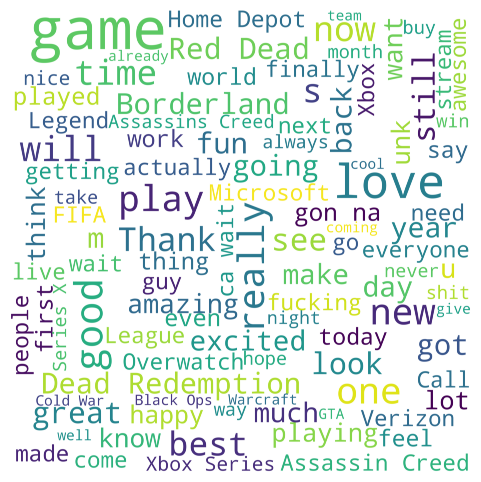

In [34]:
from wordcloud import WordCloud
word_cloud_text = ''.join(train[train["Sentiment"]=="Positive"].Text)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

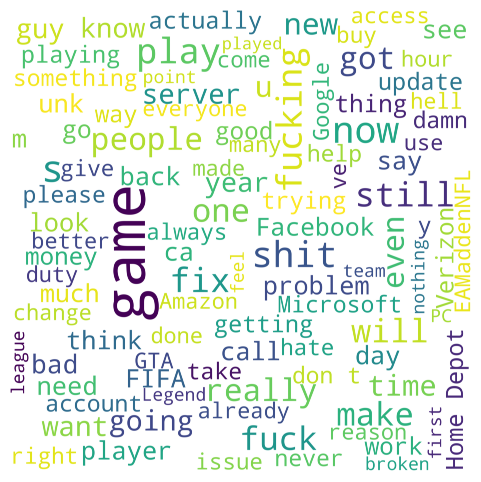

In [35]:
from wordcloud import WordCloud
word_cloud_text = ''.join(train[train["Sentiment"]=="Negative"].Text)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

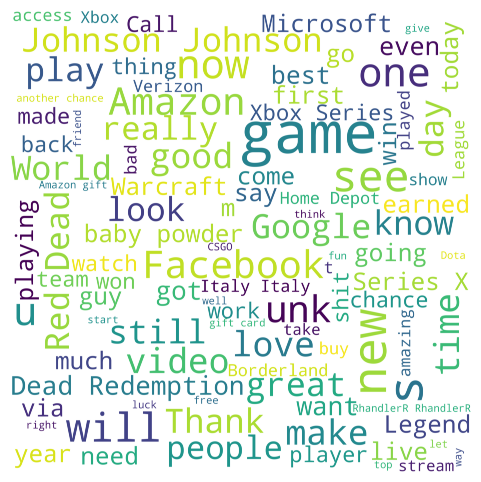

In [36]:
from wordcloud import WordCloud
word_cloud_text = ''.join(train[train["Sentiment"]=="Neutral"].Text)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

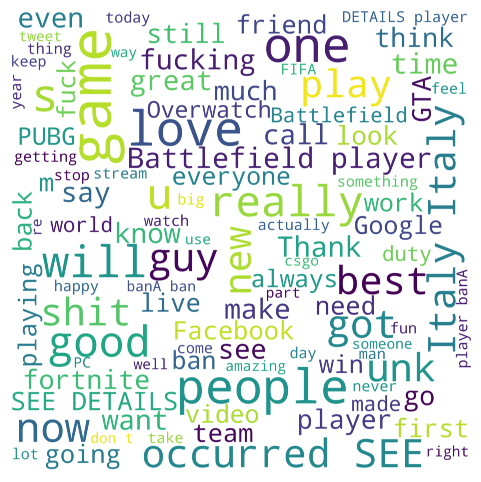

In [37]:
from wordcloud import WordCloud
word_cloud_text = ''.join(train[train["Sentiment"]=="Irrelevant"].Text)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

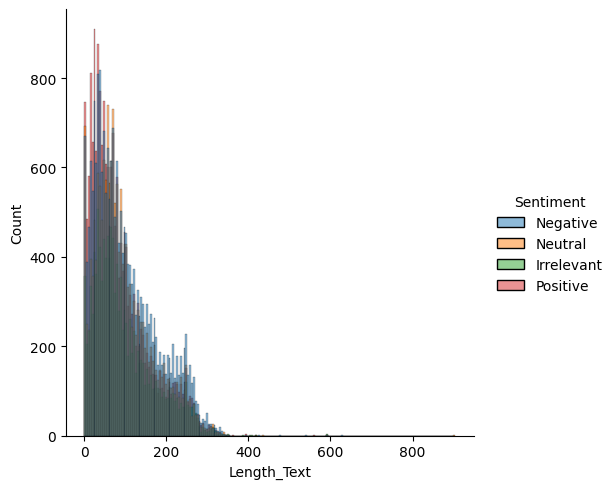

In [38]:
sns.displot(x=train['Length_Text'],hue=train['Sentiment'])

In [39]:
x = train['Text']


In [40]:
train['Text'].unique()

array(['amazon probably some of the worst customer service I ve had to deal with lately',
       'Definitely walmart Amazon gon na fuck people over with the shipping',
       'Definitely Walmart Amazon is going to fuck you with delivery',
       ...,
       'Johnson Johnson to commence selling baby powder throughout Canada',
       'Johnson Johnson stops selling baby powder in the United States Canada',
       'Johnson Johnson to stop producing baby talc powder Chicago'],
      dtype=object)

In [41]:
y = train['Sentiment'].map({"Positive":0,"Negative":1,"Neutral":2,"Irrelevant":3})

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [44]:
x_train.shape

(57585,)

In [45]:
x_test.shape

(14397,)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer()

X_train_vect = vectorizer.fit_transform(x_train)
X_test_vect = vectorizer.transform(x_test)

In [47]:
X_train_vect[0]

<1x24636 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier()

In [51]:
rfc.fit(X_train_vect,y_train)

RandomForestClassifier()

In [53]:
y_pred = rfc.predict(X_test_vect)

In [55]:
output = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred })
output.head(10)

,Actual,Predicted
34698,2,2
47081,2,2
63365,1,1
28104,0,0
60614,3,2
22204,0,0
59652,3,3
20755,2,2
25949,1,0
72515,0,0


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3943
           1       0.89      0.93      0.91      4367
           2       0.89      0.89      0.89      3578
           3       0.97      0.83      0.89      2509

    accuracy                           0.90     14397
   macro avg       0.91      0.89      0.90     14397
weighted avg       0.90      0.90      0.90     14397



In [60]:
X_val = vectorizer.transform(valid['Text'])

In [61]:
rfc.predict(X_val[0])

array([3])

In [62]:
valid['Text'][0]

'I mentioned on Facebook that I was struggling for motivation to go for a run the other day which has been translated by Tom s great auntie as Hayley can t get out of bed and told to his grandma who now thinks I m a lazy terrible person'

In [63]:
valid['Sentiment'][0]

'Irrelevant'

In [64]:
predicted = rfc.predict(X_val[0])
if predicted == [0]:
  print("Postive")
elif predicted  == [1]:
  print("Negative")
elif predicted == [2]:
  print("Neutral")
else:
  print("Irrelevant")

Irrelevant


In [68]:
input_valid_data = valid['Text'][7]
print("Actual : ",valid['Sentiment'][7])
predicted = rfc.predict(X_val[7])
if predicted == [0]:
  print("Predicted : Postive")
elif predicted  == [1]:
  print("Predicted : Negative")
elif predicted == [2]:
  print("Predicted : Neutral")
else:
  print("Predicted : Irrelevant")

Actual :  Positive
Predicted : Postive


In [69]:
input_valid_data = valid['Text'][20]
print("Actual : ",valid['Sentiment'][20])
predicted = rfc.predict(X_val[20])
if predicted == [0]:
  print("Predicted : Postive")
elif predicted  == [1]:
  print("Predicted : Negative")
elif predicted == [2]:
  print("Predicted : Neutral")
else:
  print("Predicted : Irrelevant")

Actual :  Negative
Predicted : Negative
